Copyright (C) 2023 Pablo Castells y Alejandro Bellogín

El código que contine este notebook se ha implementado para la realización de las prácticas de la asignatura "Búsqueda y minería de información" de 4º del Grado en Ingeniería Informática, impartido en la Escuela Politécnica Superior de la Universidad Autónoma de Madrid. El fin del mismo, así como su uso, se ciñe a las actividades docentes de dicha asignatura.

### **Búsqueda y Minería de Información 2022-23**
### Universidad Autónoma de Madrid, Escuela Politécnica Superior
### Grado en Ingeniería Informática, 4º curso

# Bloque 2 - Análisis de redes sociales

Fechas:

* Comienzo: martes 28 / jueves 30 de marzo.
* Entrega: lunes 8 de mayo, 23:59.

## Objetivos

Este segundo bloque de la práctica tiene por objetivo la implementación de funcionalidades de análisis de redes sociales. En este bloque se desarrollarán:

* Métricas que se utilizan en el análisis de redes sociales.
* Otras funcionalidades a elección opcional del estudiante, tales como más métricas, la detección de comunidades, la generación aleatoria de redes sociales, o la recomendación de contactos.

## Material proporcionado

Se proporcionan software y datos para la realización de la práctica:

* Un esqueleto de clases y funciones donde el estudiante desarrollará sus implementaciones. De modo similar a las prácticas anteriores, se proporciona una celda de prueba al final, que deberá funcionar con el código implementado por el estudiante.
* Redes sociales de prueba:
  - Tres redes pequeñas de prueba.
  - Redes reales: la red disponible en [SNAP (facebook_combined)](https://snap.stanford.edu/data/egonets-Facebook.html), y <ins>twitter.csv</ins> obtenida mediante una descarga de Twitter (unos 10 mil usuarios con medio millón de relaciones follow).
  - Al conjunto de redes de prueba, el estudiante añadirá dos redes más, simuladas, en el ejercicio 5.
  
Los esqueletos de código que se proporcionan aquí son a modo de guía: el estudiante puede modificarlo todo libremente, siempre que la celda de prueba funcione correctamente **sin cambios**.

## Calificación

El peso de esta práctica (recomendación + redes sociales) en la nota final de prácticas es del **40%**.

La calificación se basará en el **número** de ejercicios realizados y la **calidad** de los mismos. La puntuación que se indica en cada apartado es orientativa, en principio se aplicará tal cual se refleja pero podrá matizarse por criterios de buen sentido si se da el caso.

Para dar por válida la realización de un ejercicio, el código deberá funcionar (a la primera) integrado con las clases que se facilitan. El profesor comprobará este aspecto ejecutando la celda de prueba y otras adicionales.

La corrección de las implementaciones se observará por la **coherencia de los resultados**, y se valorará la eficiencia en tiempo de ejecución.

## Entrega

La entrega consistirá en dos ficheros tipo *notebook* (uno para recomendación y otro para redes sociales) donde se incluirán todas las **implementaciones** solicitadas en cada ejercicio, así como una explicación de cada uno a modo de **memoria**.

## Indicaciones

La realización de los ejercicios conducirá en muchos casos a la implementación de funciones y/o clases adicionales a las que se indican en el enunciado. Algunas vendrán dadas por su aparición en los propias celdas de prueba, y otras por conveniencia a criterio del estudiante.

Igual que en prácticas anteriores, no deberán editarse las celdas de prueba. Estas celdas deberán ejecutar sin errores a la primera con el código entregado por el estudiante (naturalmente con salvedad de los ejercicios que no se hayan implementado.

## Ejercicio 5: Preliminares (1.5pt)

Generar dos **redes sociales simuladas** siguiendo los modelos de Barabási-Albert y Erdös-Rényi. El tamaño y densidad de los grafos se deja a elección propia. Se puede utilizar para ello cualquier herramienta (como NetworkX, o el entorno interactivo de Gephi), o bien programar implementaciones propias (lo cual también es muy sencillo).

Realizar un análisis básico de la **distribución del grado** en las siete redes sociales de la práctica: small x 3, Facebook, Twitter, Barabási-Albert y Erdös-Rényi. Para cada red:

* Generar una gráfica de distribución del grado (utilizando escala log-log cuando ello sea útil) y comprobar en qué medida se observa una distribución power law.
* Verificar si se observa la paradoja de la amistad (en sus diferentes versiones).

Los resultados de este ejercicio no conllevan entrega de software, sino sólo la documentación de los mismos en el apartado de memoria.

In [45]:
import random
import collections
import matplotlib.pyplot as plt
import pandas as pd

class Node:
    def __init__(self, name):
        self.name = name
        self.neighbors = []

class Graph:
    def __init__(self, file = None):
        self.nodes = []
        if file:
            self.load_from_file(file)

    def add_node(self, name):
        # Check if node already exists
        for node in self.nodes:
            if node.name == name:
                return node
        node = Node(name)
        self.nodes.append(node)
        return node

    def add_edge(self, node1, node2):
        node1.neighbors.append(node2)
        node2.neighbors.append(node1)
    
    def get_nodes(self):
        return self.nodes
    
    def load_from_file(self, file):
        # if .csv
        if file[-4:] == '.csv':
            df = pd.read_csv(file, sep=',')
        # if .txt
        elif file[-4:] == '.txt':
            df = pd.read_csv(file, sep=' ')
        else:
            print('File not supported')
            return
        df.columns = ['node1', 'node2']
        # Obtain a sample of 1000 rows
        df = df.sample(n=10000)
        
        # Get length of dataframe
        size = len(df)
        for index, row in df.iterrows():
            node1 = row['node1']
            if node1 not in self.nodes:
                node1 = self.add_node(node1)
            node2 = row['node2']
            if node2 not in self.nodes:
                node2 = self.add_node(node2)
            self.add_edge(node1, node2)
    
    def to_csv(self, file):
        df = pd.DataFrame()
        explored = []
        for node in self.nodes:
            explored.append(node)
            for neighbor in node.neighbors:
                if neighbor not in explored:
                    df = pd.concat([df, pd.DataFrame.from_records([{node.name, neighbor.name}])])
        df = df.drop_duplicates()
        df.to_csv(file, index=False, sep=',', header=False)




def erdos(n, p):
    graph = Graph()
    for i in range(n):
        graph.add_node(i)
    nodes = graph.get_nodes()
    for i, node1 in enumerate(nodes):
        for node2 in nodes[i+1:]:
            if random.random() < p:
                graph.add_edge(node1, node2)
    return graph

def barabasi(n, m):
    graph = Graph()
    nodes = graph.get_nodes()
    edge_total = m*(m-1)
    for i in range(m, n):
        node = graph.add_node(i)
        for j in range(m):
            neighbor = _barabasi_pick_target(nodes[:i], edge_total)
            graph.add_edge(node, neighbor)
        edge_total += m*2
    return graph
    

def _barabasi_pick_target(nodelist, edge_total):
    r = int(random.uniform(0, edge_total))
    sum = 0
    for node in nodelist:
        sum = sum + len(node.neighbors)
        if sum > r:
            return node
    return nodelist[-1]



def analyze_degree_distribution(graph):
    degrees = [len(node.neighbors) for node in graph.nodes]
    degree_counts = collections.Counter(degrees)
    # Order the degree distribution
    degree_counts = dict(sorted(degree_counts.items()))

    # Friend paradox
    avg_degree = sum(degrees)/len(degrees)
    median_degree = sorted(degrees)[len(degrees)//2]
    print("Median degree: " + str(median_degree))
    print("Average degree: " + str(avg_degree))
    if median_degree <= avg_degree:
        print("Median <= Average, Friend paradox: True")
    else:
        print("Median > Average, Friend paradox: False")


    # Plot the degree distribution
    # plot logaritic
    x = list(degree_counts.keys())
    y = list(degree_counts.values())
    plt.scatter(x, y)
    plt.xlabel('Degree')
    plt.ylabel('Nº of Nodes')
    plt.title('Degree Distribution')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.show()


In [46]:

erdos_graph = erdos(100, 0.05)
erdos_graph.to_csv('networks/erdos.csv')

barabasi_graph = barabasi(100, 5)
barabasi_graph.to_csv('networks/barabasi.csv')


Median degree: 201
Average degree: 200.806
Median > Average, Friend paradox: False


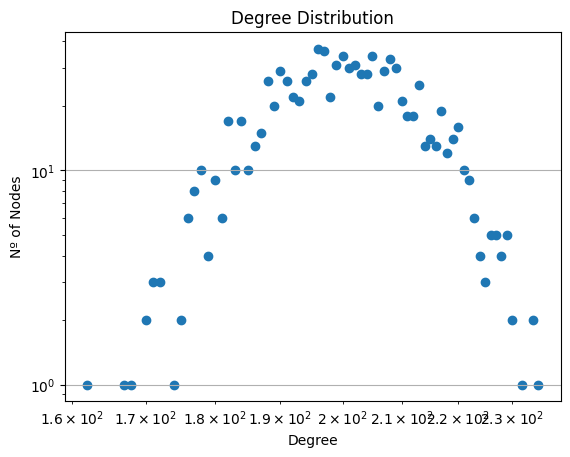

In [47]:
# Create a graph with 100 nodes and edge probability 0.2
graph = erdos(1000, 0.2)
analyze_degree_distribution(graph)

Median degree: 29
Average degree: 40.0
Median <= Average, Friend paradox: True


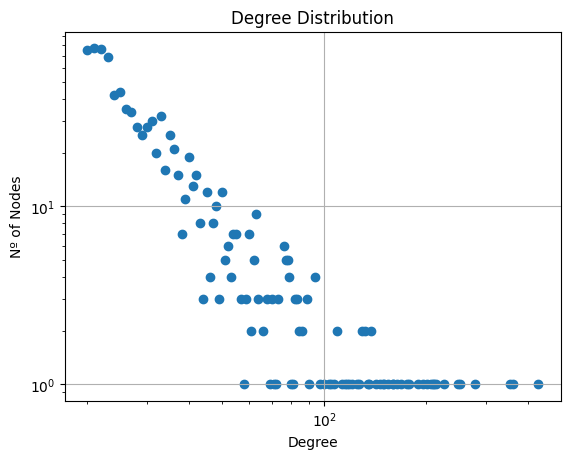

In [48]:
# Create a graph with 100 nodes and 5 edges per node
graph = barabasi(1000, 20)
analyze_degree_distribution(graph)

Median degree: 2
Average degree: 3.0106879421947914
Median <= Average, Friend paradox: True


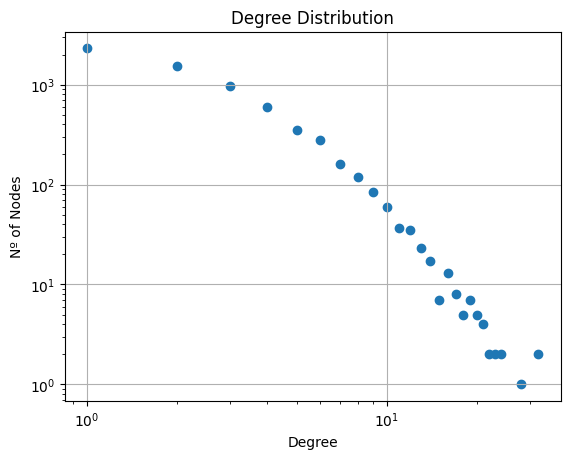

In [49]:
# Read the graph from the csv file networks/twitter.csv
graph = Graph('networks/twitter.csv')
analyze_degree_distribution(graph)

In [50]:
graph = Graph('networks/facebook_combined.txt')
analyze_degree_distribution(graph)

KeyboardInterrupt: 

Hemos diseñado un modelo de Erdos y de Barabasi para simular el comportamiento de las redes sociales. En el modelo de Erdos se generan enlaces aleatorios entre los distintos nodos que forman la red (Con la probabilidad asignada), mientras que en el modelo de Barabasi se generan aristas de forma aleatoria pero con una probabilidad proporcional al grado de los nodos (Es decir, los ricos se hacen más ricos porque tienen más probabilidad). Además, hemos utilizado los grafos de twitter y facebook proporcionados. 

A partir de los modelos hemos realizado un análisis de la distribución de grado de cada uno:
### Modelo de Erdos
![erdos](erdos.png)
Como se puede observar, tiene una distribución de grado muy similar a la de una distribución normal, por lo que sigue una distribución power law. En este caso la mediana no está ajustada a la izquierda de la media, ya que la media y la mediana son muy similares. Por ello no se observa la paradoja de la amistad.

### Modelo de Barabasi
![barabasi](barabasi.png)
Utilizando el modelo de Barabasi se observa que existen una gran cantidad de nodos con un grado muy bajo, y unos pocos con un grado muy alto. Esto se debe a que los nodos con un grado alto tienen más probabilidad de generar aristas, por lo que se van haciendo más grandes. Por lo tanto se puede considerar que sigue una distribucion power law. Al ser la mediana menor que la media, los nodos vecinos de un nodo tienen un grado similar, por lo que se puede considerar que sigue la paradoja de la amistad.

### Twitter
![twitter](twitter.png)
Como se puede observar, la distribución de grado de la muestra de la red de twitter también sigue una distribución power law, donde unos pocos nodos tienen un grado muy alto y la mayoría tienen un grado muy bajo (recordemos que la gráfica está en escala logarítmica). Al ser la mediana menor que la media, los nodos vecinos de un nodo tienen un grado similar, por lo que se puede considerar que sigue la paradoja de la amistad.

### Facebook
![facebook](facebook.png)
Finalmente tenemos la muestra de la red de facebook, donde encontramos resultados similares a la de twitter. Se observa claramente una distribución power law, y que se cumple, como en twitter, la paradoja de la amistad. Cabe destacar que Facebook limita bastante los contactos que se pueden tener, por lo que no se observa una distribución tan marcada como en twitter.


## Ejercicio 6: Métricas (1.5pt)

Se implementarán las siguientes métricas topológicas:

* Coeficiente de **clustering de un usuario**.
* **Arraigo** de un arco (o de un par de usuarios).
* Coeficiente de **clustering de una red social**.
* Coeficiente de **asortatividad** de grado de una red.

Algunas indicaciones en forma de pregunta:

* ¿Cómo obtener la red ego de un usuario en una sóla operación de *slicing* del array 2D de adyacencia?
* ¿Cómo calcular la densidad de una red social en *una* sola operación sobre su matriz de adyacencia? 
* ¿Cómo obtener el solapamiento de los amigos de dos usuarios con una sola operación vectorial?
* ¿Cómo obtener la unión de dos vecindarios de forma eficiente sabiendo su solapamiento?

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import os.path
import networkx as nx
from matplotlib import pyplot as plt

class UndirectedSocialNetwork:
    #
    # In order to spare you some routine coding, we provide this constructor for you, 
    # that builds the basic structures you need to implement your metrics: the network 
    # adjacency matrix, the uid <--> uiidx back and forth mappings, and the number of edges.
    #
    # For your purposes you don't need to go into the implementation details or fully
    # understand every step how they are built -- you just need to use the  provided matrix 
    # and id mapping structure.
    #
    def __init__(self, file, sep=','):
        self.file=file
        edges = pd.read_csv(file, names=['u', 'v'], delimiter=sep)
        edges['r'] = np.ones(len(edges))

        # Take the union of uids, as there may be users who only appear in one data frame column and not the other.
        us = edges.u.unique()
        vs = edges.v.unique()
        self.uids = np.union1d(us, vs)
        self.uidxs = {u:j for j, u in enumerate(self.uids)}
        
        # Add dummy columns (with r=0) so that all userids appear in both data frame columns (otherwise they'd fail
        # to have a row or column in the adjacency matrix). 
        udiff = np.setdiff1d(us, vs)
        vdiff = np.setdiff1d(vs, us)
        edges = pd.concat([edges, pd.DataFrame({'u': vdiff, 'v': np.full(len(vdiff), us[0]), 'r': np.zeros(len(vdiff))})])
        edges = pd.concat([edges, pd.DataFrame({'u': np.full(len(udiff), vs[0]), 'v': udiff, 'r': np.zeros(len(udiff))})])
        
        # Get adjacency matrix.
        edges = edges.pivot(index='u', columns='v', values='r')
        self.m = edges.fillna(0).to_numpy(dtype=np.bool_)
        # Make the adjacency matrix symmetric for an undirected network.
        self.m = np.logical_or(self.m, self.m.T).astype(np.float32)
        # We only count the edges now in case the network file contained reciprocal edges for a directed network,
        # in which case we ignored the edge direction, while the csv file contained more rows than the number of
        # undirected edges.
        self._nedges = self.m.sum()/2

    def matrix(self):
        return self.m

    def nusers(self):
        return len(self.uids)
    
    def nedges(self):
        return self._nedges

    def uid_to_uidx(self, uid):
        return np.where(self.uids == uid)
        
    
    # uidx can be an int of an array of ints.
    def uidx_to_uid(self, uidx):
        return self.uids[uidx]


    def _friends(self, uidx):
        return np.where(self.m[uidx])[0]
    
    def _common_friends(self, uidx1, uidx2):
        friends1 = self._friends(uidx1)
        friends2 = self._friends(uidx2)
        common_friends = np.intersect1d(friends1, friends2)
        return common_friends
    
    #
    # For debugging purposes.
    #
    
    def degree(self, uid):
        return self.m[self.uid_to_uidx(uid)].sum()

    def friends(self, uid):
        return self._friends(self.uid_to_uidx(uid))
        
    #
    # Network metrics.
    #
    
    # Global computation of the clustering coefficient (micro-average).
    def clustering(self):
        n_users = self.nusers()
        if n_users <= 2:
            return 0.0
        
        triangles   = np.diag(self.m @ self.m @ self.m) / 2
        degrees     = self.m.sum(axis=0)

        all_clusterings = np.zeros(n_users)
        for i in range(n_users):
            k_i = degrees[i]
            if k_i >= 2:
                all_clusterings[i] = 2 * triangles[i] / (k_i * (k_i - 1))
        
        clustering = np.mean(all_clusterings)
        return clustering
        

    def assortativity(self):
        m               = self.nedges()
        s12             = 0
        s2              = 0
        s3              = 0
        explored        = []

        for i in range(self.nusers()):
            explored.append(i)
            friends = self._friends(i)
            for j in friends:
                if j not in explored:
                    s12 += len(self._friends(i)) * len(self._friends(j))
            s2 += len(self._friends(i)) ** 2
            s3 += len(self._friends(i)) ** 3

        # print("M", m, "S12", s12, "S2", s2, "S3", s3)
        # M 5.0 S12 66 S2 26 S3 70 = 644 /
        r = (4 * m * s12  -  s2 ** 2)  /  (2 * m * s3  -  s2 ** 2)
        return r

    #
    # User metrics.
    #
    
    # Network clustering coefficient as the average clustering coefficient of users.
    def avg_clustering(self):
        return UserMetric(self, np.array([self.user_clustering(uidx) for uidx in range(self.nusers())])) # Codigo dado

    # Clustering coefficient of individual user - just needed for the average CC.
    def user_clustering(self, uidx):
        friends                 = self._friends(uidx)
        possible                = len(friends) * (len(friends) - 1) / 2

        friends_network         = self.m[friends][:, friends]
        real                    = friends_network.sum() / 2
        clustering_coefficient  = real / possible if possible > 0 else 0

        return clustering_coefficient

    #
    # Edge metrics.
    #
    
    def embeddedness(self): # Arraigo
        n_users  = self.nusers()
        embeddings  = np.zeros((n_users, n_users))

        for i in range(n_users):
            for j in range(i+1, n_users):
                embedding        = len(self._common_friends(i,j)) / (len(self._friends(i)) + len(self._friends(j)))
                embeddings[i][j] = embedding
                embeddings[j][i] = embedding
        
        return EdgeMetric(self, embeddings)


#
# Auxiliary classes to hold and return values of user metrics and edge metrics.
#
    
# Aiming to spare you some routine coding, the purpose of these two classes is 
# to hold the metric values through their constructur, and return the mean and 
# ranked values of user and edge metrics when requested. 
#
# For your purposes you don't need to go into the implementation details, or
# understand every step of these functions -- you just need to use the simple
# API they provide.
    
class UserMetric:
    def __init__(self, network, values):
        self.network = network
        self._values = values
        self.sorted_uidx = (rankdata(-values, method='ordinal')).argsort()

    # Return the mean value across all users in the network.
    def mean(self):
        return self._values.mean()

    # Return the metric value for one user.
    def value(self, uid):
        return self._values[self.network.uid_to_uidx(uid)]

    # Return a dictionary with the top n users in the metric.
    def values(self, n):
        return {l:fround(v, 4) for l, v in zip(self.network.uids[self.sorted_uidx[:n]],
                                                   self._values[self.sorted_uidx[:n]])}

class EdgeMetric:
    def __init__(self, network, values):
        self.network = network
        values[np.tril_indices(values.shape[0])] = np.iinfo(int).min
        self._values = values
        tri = int(network.nusers() * (network.nusers() - 1) / 2)
        self.order = np.dstack(np.unravel_index(np.argsort(rankdata(-values.ravel(), method='ordinal')), values.shape))[0][:tri]
        self.ordered_values = np.array([self._values[e[0],e[1]] for e in self.order])

    # Return the mean value across all edges in the network.
    def mean(self):
        return self.ordered_values.mean()

    # Return the metric value for one edge (the edge may or may not exist).
    def value(self, uid, vid):
        uidx, vidx = self.network.uid_to_uidx(uid), self.network.uid_to_uidx(vid)
        return self._values[min(uidx, vidx), max(uidx, vidx)]

    # Return a dictionary with the top n edges in the metric.
    def values(self, n):
        n = min(n, len(self.order))
        return {tuple(self.network.uidx_to_uid(e)):fround(self._values[e[0],e[1]], 4) for e in self.order[:n]}
    
# Just for pretty-printing numbers.
def fround(x, n=20):
    r = round(x)
    rn = round(x, n)
    return r if rn == r else rn

### Explicación/documentación
En el ejercicio se proponían cuatro objetivos a obtener, los cuales se han implementado de la siguiente forma:
#### Coeficiente de clustering de un usuario
La implementación del coeficiente de clustering del usuario es muy sencilla, simplemente se obtienen todos los amigos del nodo objetivo, con sus conexiones reales entre ellos y las conexiones posibles si estuviesen totalmente conectados. Para obtener las reales se divide entre dos ya que utilizamos una matriz simétrica. Finalmente se divide entre las conexiones posibles y se obtiene el coeficiente de clustering del usuario.
#### Arraigo de un arco (o de un par de usuarios)
La implementación del arraigo de un arco consiste en obtener para cada nodo, el número de amigos que tiene en común con el otro nodo. Para ello se obtienen los amigos de cada nodo y se realiza la intersección entre ellos. Finalmente se obtiene el arraigo del arco dividiendo entre el número de amigos totales de ambos nodos.
#### Coeficiente de clustering de una red social
Par implementar el coeficiente de clustering de la red, obtenemos el número de triángulos que posee la red, y para cada nodo, lo dividimos entre el número de conexiones posibles que tiene. Finalmente se obtiene el coeficiente de clustering de la red haciendo la media de todos los nodos.
#### Coeficiente de asortatividad de grado de una red
Para obtener el coeficiente de asortatividad de grado de una red, utilizamos la fórmula correspondiente. El coeficiente de asortatividad nos ayuda a comprender si la red está más o menos separada en comunidades.


||Facebook|Twitter
|-|:-:|:-:
|Coef. clustering usuario|0.3972|0.0410
|Embededness|0.1756|0.0082
|Coef. clustering global|0.6055|0.2732
|Asortatividad|0.0636|-0.0771

## Ejercicio 7: Ejercicio libre (fuera de puntuación)

El estudiante desarrollará uno o varios métodos de análisis de redes a su propia elección. Se sugiere por ejemplo: 

* Implementación de métricas adicionales, tales como betweenness, closeness, distancia promedio, diámetro, modularidad, etc. (Para la modularidad, se necesitará definir una partición de los nodos &ndash; consultar con el profesor.)
* Detección de comunidades y enlaces débiles.
* Creación de modelos para la generación aleatoria de redes sociales (p.e. amigos de amigos, etc.).
* Recomendación de contactos.

Para este ejercicio deberá completarse la implementación de una función adicional `student_test()` ilustrando la ejecución de las métricas y algoritmos implementados. 

El software que se desarrolle se incluirá en la celda que sigue, y se documentarán en la memoria las pruebas realizadas y los resultados obtenidos. 

Este ejercicio se evaluará en base a la cantidad, calidad e interés del trabajo realizado.

In [52]:
# Implementación o implementaciones elegidas

In [53]:
def student_test(data):
    pass
    # Código aquí...

### Explicación/documentación

(por hacer)

## Visualización de las redes pequeñas de prueba

Descarga los ficheros del curso de Moodle y coloca sus contenidos en una carpeta **networks** en el mismo directorio que este *notebook*. Visualizar las redes de prueba facilita las comprobaciones que puedan ser necesarias durante la depuración del código.

networks/toy1.html
networks/toy2.html
networks/toy3.html


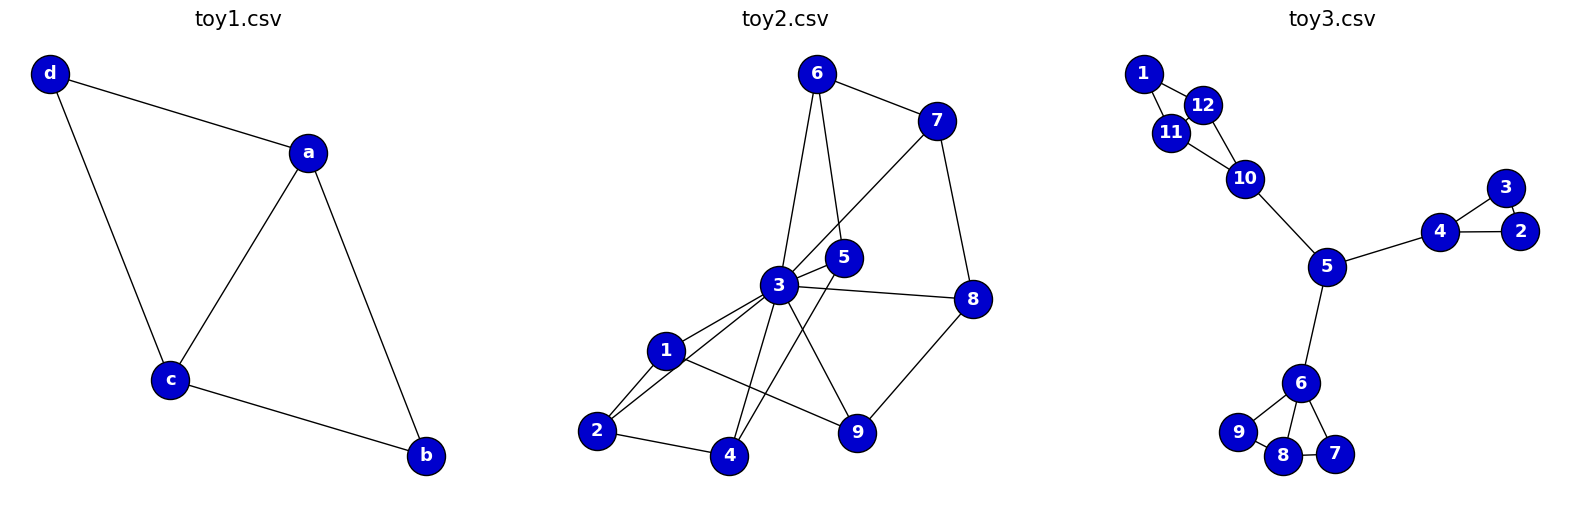

In [54]:
from pyvis.network import Network

def plot(file, ax=None, sep=','):
    g = nx.from_pandas_edgelist(pd.read_csv(file, names=['u', 'v'], delimiter=sep), 
                                source='u', target='v')
    options = {
        'node_size': 750, 'node_color': 'mediumblue', 'edgecolors': "black",
        'font_color': 'white', 'font_weight': 'bold', 'font_size': 13
    }
    if not ax: 
        f = plt.figure()
        f.set_size_inches(3, 3)
        
    # Plot the graphs in the output cell.
    nx.draw(g, ax=ax, with_labels=True, **options)
    filename = os.path.split(file)[1]
    (ax if ax else plt.gca()).set_title(filename, fontsize=15)
    
    # Plot the graphs into interactive HTML files.
    net = Network(notebook=True, cdn_resources='remote')
    net.from_nx(g)
    net.show(file.split('.')[0] + '.html')
    

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(20, 6)
plot('networks/toy1.csv', ax1)
plot('networks/toy2.csv', ax2)
plot('networks/toy3.csv', ax3)

## Celda de prueba

In [55]:
import datetime, time

def test_network(file, topn, example_u, example_v, sep=','):
    print(f'==================================================\nTesting {file} network')
    network = UndirectedSocialNetwork(file, sep=sep)
    print(f'Network matrix takes {round(10 * network.matrix().nbytes / 1024 / 1024) / 10:,} MB in RAM')
    print(f'{network.nusers():,} users and {network.nedges():,} contact relationships')
    print(f'User {example_u} has {network.degree(example_u):,} contacts: ', network.friends(example_u))
    print('-------------------------')
    start = time.time()
    c = network.avg_clustering()
    print(f'User clustering coefficient (top {topn}): {c.values(5)}')
    print(f'  CC({example_u}) =              {c.value(example_u)}')
    print('Network clustering coefficient:')
    print(f'  Macro-average =      {c.mean()}')  
    start = timer(start)
    print(f'  Micro-average =      {network.clustering()}')
    start = timer(start)
    print(f'Assortativity =        {network.assortativity()}')
    start = timer(start)
    e = network.embeddedness()
    print(f'Edge embeddedness (top {topn}): {e.values(5)}')
    print(f'  Embeddedness({example_u}, {example_v}) = {e.value(example_u, example_v)}')
    print(f'  Average =            {e.mean()}')
    timer(start)

    # Otros tests?
    student_test(network)

from termcolor import colored
def timer(start):
    print(colored(f'  --> elapsed time: {datetime.timedelta(seconds=round(time.time() - start))} <--', 'blue'))
    return time.time()
    
test_network('networks/toy1.csv',              topn=5, example_u='a',       example_v='b')
test_network('networks/toy2.csv',              topn=5, example_u=5,         example_v=6)
test_network('networks/toy3.csv',              topn=5, example_u=6,         example_v=4)
test_network('networks/facebook_combined.txt', topn=5, example_u=9,         example_v=3, sep=' ')
test_network('networks/twitter.csv',           topn=5, example_u='el_pais', example_v='ElviraLindo') # Contains a number of reciprocal edges but we ignore direction.
test_network('networks/barabasi.csv',          topn=5, example_u=2000,         example_v=3000)
test_network('networks/erdos.csv',             topn=5, example_u=2000,         example_v=3000)
print('==================================================\nDone.')

Testing networks/barabasi.csv network
Network matrix takes 0.0 MB in RAM
95 users and 391.0 contact relationships
User 2000 has 0.0 contacts:  []
-------------------------
User clustering coefficient (top 5): {71: 0.6667, 54: 0.6, 95: 0.6, 68: 0.5238, 38: 0.5}
  CC(2000) =              []
Network clustering coefficient:
  Macro-average =      0.20245255037643153
  --> elapsed time: 0:00:00 <--
  Micro-average =      0.20245255037643153
  --> elapsed time: 0:00:00 <--
Assortativity =        -0.16253112507752263
  --> elapsed time: 0:00:00 <--
Edge embeddedness (top 5): {(95, 97): 0.4, (71, 78): 0.375, (31, 71): 0.3333, (26, 55): 0.3, (42, 86): 0.3}
  Embeddedness(2000, 3000) = []
  Average =            0.05999692535377152
  --> elapsed time: 0:00:00 <--
Testing networks/erdos.csv network
Network matrix takes 0.0 MB in RAM
100 users and 244.0 contact relationships
User 2000 has 0.0 contacts:  []
-------------------------
User clustering coefficient (top 5): {50: 1, 16: 0.3333, 41: 0.3333

/tmp/ipykernel_6304/2035918655.py:210: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  return self._values[min(uidx, vidx), max(uidx, vidx)]
/tmp/ipykernel_6304/2035918655.py:210: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  return self._values[min(uidx, vidx), max(uidx, vidx)]


### Salida obtenida por el estudiante

In [56]:
==================================================
Testing networks/toy1.csv network
Network matrix takes 0.0 MB in RAM
4 users and 5.0 contact relationships
User a has 3.0 contacts:  [0 0 0]
-------------------------
User clustering coefficient (top 5): {'b': 1, 'd': 1, 'a': 0.6667, 'c': 0.6667}
  CC(a) =              [0.66666667]
Network clustering coefficient:
  Macro-average =      0.8333333333333333
  --> elapsed time: 0:00:00 <--
  Micro-average =      0.8333333333333333
  --> elapsed time: 0:00:00 <--
Assortativity =        -0.6666666666666666
  --> elapsed time: 0:00:00 <--
Edge embeddedness (top 5): {('b', 'd'): 0.5, ('a', 'c'): 0.3333, ('a', 'b'): 0.2, ('a', 'd'): 0.2, ('b', 'c'): 0.2}
  Embeddedness(a, b) = [[0.2]]
  Average =            0.2722222222222222
  --> elapsed time: 0:00:00 <--
==================================================
Testing networks/toy2.csv network
Network matrix takes 0.0 MB in RAM
9 users and 16.0 contact relationships
User 5 has 3.0 contacts:  [0 0 0]
-------------------------
User clustering coefficient (top 5): {1: 0.6667, 2: 0.6667, 4: 0.6667, 5: 0.6667, 6: 0.6667}
  CC(5) =              [0.66666667]
Network clustering coefficient:
  Macro-average =      0.6243386243386244
  --> elapsed time: 0:00:00 <--
  Micro-average =      0.6243386243386244
  --> elapsed time: 0:00:00 <--
Assortativity =        -0.3333333333333333
  --> elapsed time: 0:00:00 <--
Edge embeddedness (top 5): {(1, 4): 0.3333, (1, 8): 0.3333, (2, 5): 0.3333, (2, 9): 0.3333, (4, 6): 0.3333}
  Embeddedness(5, 6) = [[0.16666667]]
  Average =            0.20707070707070707
  --> elapsed time: 0:00:00 <--
==================================================
Testing networks/toy3.csv network
Network matrix takes 0.0 MB in RAM
12 users and 16.0 contact relationships
User 6 has 4.0 contacts:  [0 0 0 0]
-------------------------
User clustering coefficient (top 5): {1: 1, 2: 1, 3: 1, 7: 1, 9: 1}
  CC(6) =              [0.33333333]
Network clustering coefficient:
  Macro-average =      0.6666666666666666
  --> elapsed time: 0:00:00 <--
  Micro-average =      0.6666666666666666
  --> elapsed time: 0:00:00 <--
Assortativity =        -0.24271844660194175
  --> elapsed time: 0:00:00 <--
Edge embeddedness (top 5): {(7, 9): 0.5, (1, 10): 0.4, (11, 12): 0.3333, (6, 8): 0.2857, (2, 3): 0.25}
  Embeddedness(6, 4) = [[0.14285714]]
  Average =            0.08163780663780663
  --> elapsed time: 0:00:00 <--
==================================================
Testing networks/facebook_combined.txt network
Network matrix takes 62.2 MB in RAM
4,039 users and 88,234.0 contact relationships
User 9 has 57.0 contacts:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
-------------------------
User clustering coefficient (top 5): {32: 1, 33: 1, 35: 1, 42: 1, 44: 1}
  CC(9) =              [0.39724311]
Network clustering coefficient:
  Macro-average =      0.6055467186200862
  --> elapsed time: 0:00:00 <--
  Micro-average =      0.6055467186200862
  --> elapsed time: 0:00:01 <--
Assortativity =        0.06357722918564918
  --> elapsed time: 0:00:10 <--
Edge embeddedness (top 5): {(11, 12): 0.5, (11, 15): 0.5, (11, 18): 0.5, (11, 37): 0.5, (11, 43): 0.5}
  Embeddedness(9, 3) = [[0.17567568]]
  Average =            0.00908103474117465
  --> elapsed time: 0:10:41 <--
==================================================
Testing networks/twitter.csv network
Network matrix takes 383.7 MB in RAM
10,029 users and 462,399.0 contact relationships
User el_pais has 1,899.0 contacts:  [0 0 0 ... 0 0 0]
-------------------------
User clustering coefficient (top 5): {'AlanaMurrin': 1, 'AsFerreiro': 1, 'AsTheyBurn': 1, 'BJRatedR': 1, 'BarrierMetal': 1}
  CC(el_pais) =              [0.0410798]
Network clustering coefficient:
  Macro-average =      0.27323798190863785
  --> elapsed time: 0:00:07 <--
  Micro-average =      0.27323798190863785
  --> elapsed time: 0:00:08 <--
Assortativity =        -0.07719727387408556
  --> elapsed time: 0:01:47 <--
Edge embeddedness (top 5): {('AffiliateMoney9', 'WebDeveloperCom'): 0.5, ('AffiliateMoney9', 'onehunnidt'): 0.5, ('Bako_Douche_Bag', 'Kriegsson'): 0.5, ('DeafTechNews', 'mosesbillacura'): 0.5, ('DeafTechNews', 'rtsuchi'): 0.5}
  Embeddedness(el_pais, ElviraLindo) = [[0.13642214]]
  Average =            0.008283383851389839
  --> elapsed time: 2:23:08 <--
==================================================
Testing networks/barabasi.csv network
Network matrix takes 0.0 MB in RAM
95 users and 391.0 contact relationships
User 2000 has 0.0 contacts:  []
-------------------------
User clustering coefficient (top 5): {71: 0.6667, 54: 0.6, 95: 0.6, 68: 0.5238, 38: 0.5}
  CC(2000) =              []
Network clustering coefficient:
  Macro-average =      0.20245255037643153
  --> elapsed time: 0:00:00 <--
  Micro-average =      0.20245255037643153
  --> elapsed time: 0:00:00 <--
Assortativity =        -0.16253112507752263
  --> elapsed time: 0:00:00 <--
Edge embeddedness (top 5): {(95, 97): 0.4, (71, 78): 0.375, (31, 71): 0.3333, (26, 55): 0.3, (42, 86): 0.3}
  Embeddedness(2000, 3000) = []
  Average =            0.05999692535377152
  --> elapsed time: 0:00:00 <--
==================================================
Testing networks/erdos.csv network
Network matrix takes 0.0 MB in RAM
100 users and 244.0 contact relationships
User 2000 has 0.0 contacts:  []
-------------------------
User clustering coefficient (top 5): {50: 1, 16: 0.3333, 41: 0.3333, 35: 0.2, 48: 0.1786}
  CC(2000) =              []
Network clustering coefficient:
  Macro-average =      0.05579076479076479
  --> elapsed time: 0:00:00 <--
  Micro-average =      0.05579076479076479
  --> elapsed time: 0:00:00 <--
Assortativity =        -0.11012874705559679
  --> elapsed time: 0:00:00 <--
Edge embeddedness (top 5): {(9, 30): 0.3333, (46, 88): 0.3333, (75, 77): 0.3077, (6, 69): 0.2857, (9, 84): 0.25}
  Embeddedness(2000, 3000) = []
  Average =            0.022536958834149003
  --> elapsed time: 0:00:00 <--
==================================================
Done.


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3537117236.py, line 61)